In [26]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud

In [3]:
games = pd.read_csv("games.csv")
games.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [4]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [5]:
games.drop(['URL', 'Age Rating', 'ID'], axis = 1, inplace = True)

In [20]:
games.describe()

,Average User Rating,User Rating Count,Price,Size
count,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,4.060905,3.306531e+03,0.813419,1.157064e+08
std,0.751428,4.232256e+04,7.835732,2.036477e+08
min,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,4.500000,3.090000e+02,0.000000,1.330271e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [6]:
games.head()

,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


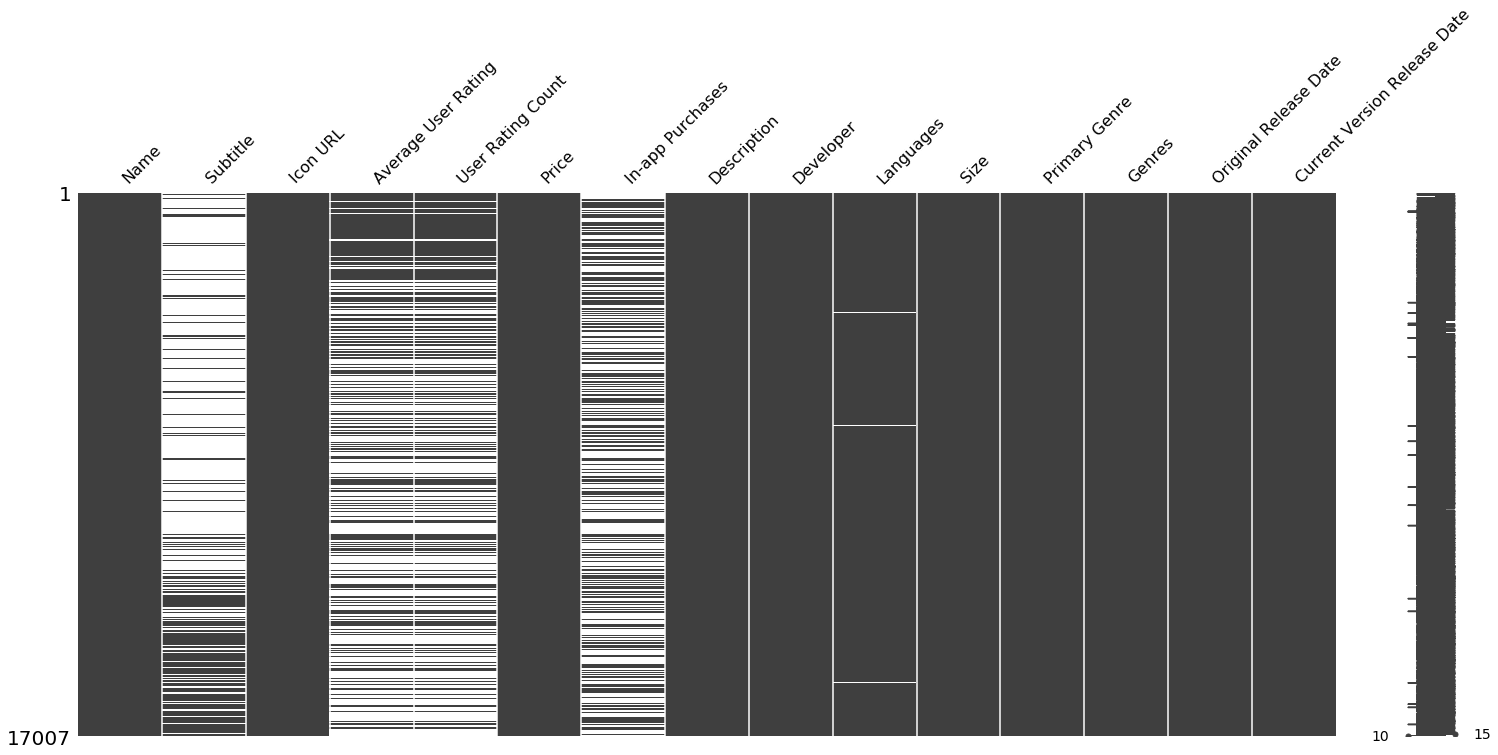

In [15]:
msno.matrix(games)
plt.show()

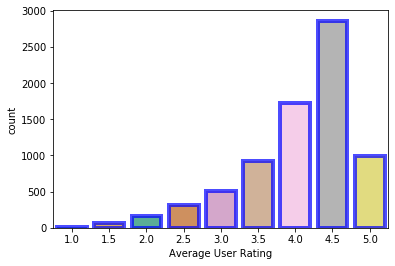

In [16]:
ax = sns.countplot(data = games, x ='Average User Rating', palette = 'colorblind', alpha = 0.7, linewidth=4, edgecolor='blue')
plt.show()

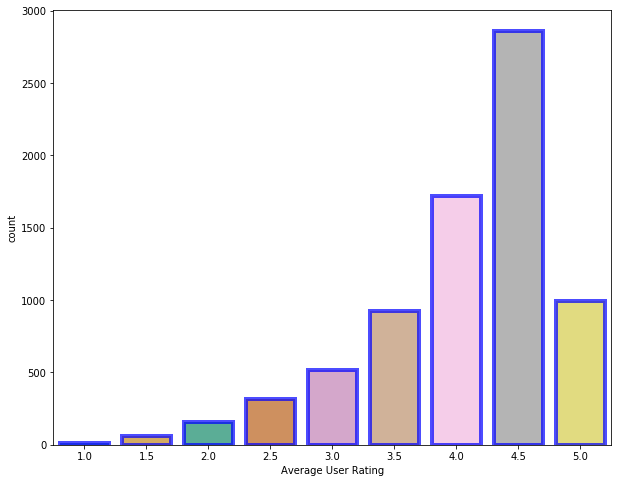

In [48]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data = games, x ='Average User Rating', palette = 'colorblind', alpha = 0.7, linewidth=4, edgecolor='blue')

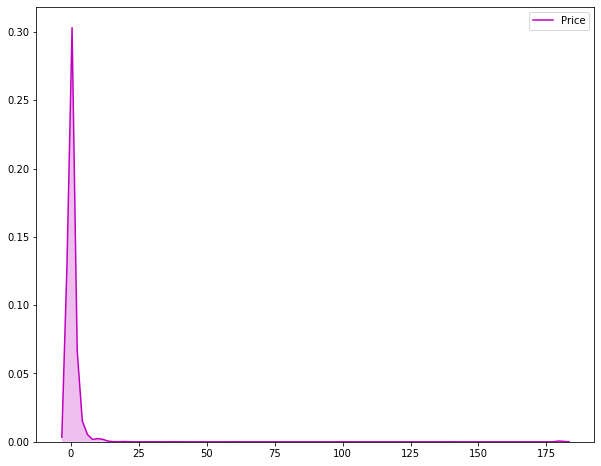

In [47]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(games.Price.dropna(), color="m", shade=True)

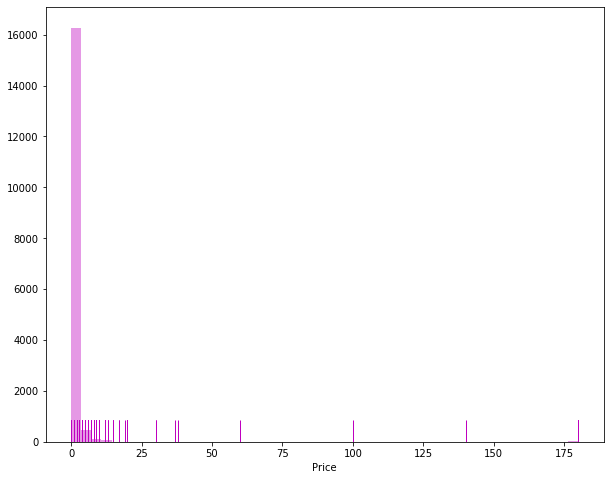

In [46]:
plt.figure(figsize=(10,8))
ax=sns.distplot(games.Price.dropna(), rug=True, kde=False, color="m")

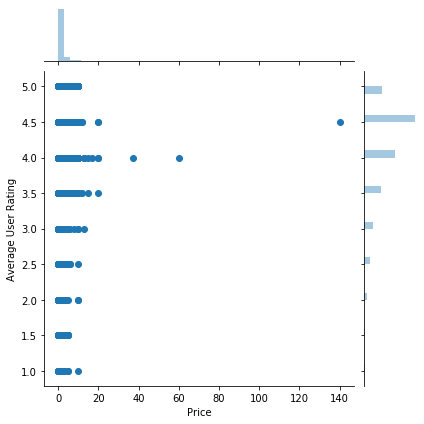

In [39]:
sns.jointplot(data=games, x="Price", y="Average User Rating")

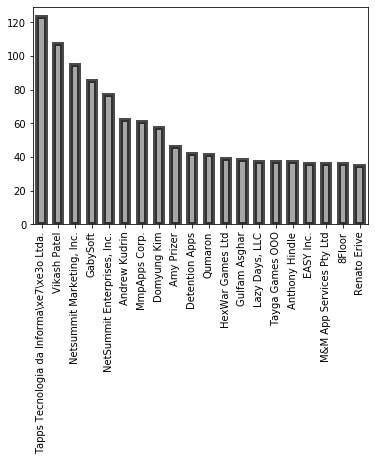

In [45]:
games.Developer.value_counts()[:20].plot(kind='bar',color = 'gray', alpha = 0.7, linewidth=4, edgecolor= 'black')

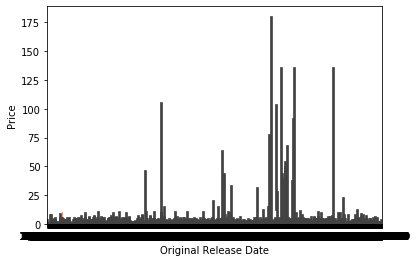

In [50]:
sns.barplot(y=games.Price,x=games["Original Release Date"])

IndexError: Inconsistent shape between the condition and the input (got (17007, 1) and (17007,))